In [2]:
!pip install matplotlib

In [3]:
import requests
import pandas as pd
import matplotlib as mpl

Happy Harvest Coffee is a company that grows the arabica coffee plant, harvests and sells the unpocessed beans.

We consider ourselfes as a true Southern American company, therefore we want to produce a Latin American product. Therefore, we decided to pick the three cities with the highest renown for their coffee (https://southamericabackpacker.com/coffee-south-america/). After evaluating the provided information, we chose to go with Armenia and Belo Horizonte. Belo Horizonte as a common coffee harvest place is far away from the coast which will complicate shipping in future, therefore we have added Pocos de Caldas to the sample which is close to Sao Paulo. The final sample consists of Armenia, Pocos de Caldas and Belo Horizonte.

The optimal conditions for growing ARABICA coffee can be reviewed here (https://www.researchgate.net/figure/Some-favorable-conditions-of-Arabica-and-Robusta-coffee-plants_tbl1_357708107) 

We chose our farming spot after three constrictions (temperature, rainfall and wind). The upper boundry for the wind speed is set as the moderate wind.

In [63]:
#weather restrictions on wind
import wikipedia
table=pd.read_html('https://en.wikipedia.org/wiki/Beaufort_scale',match='Description')
tables=table[0]
tables.iloc[4]

#according to the website strong winds should be avoided (https://openknowledge.fao.org/server/api/core/bitstreams/f0230fae-897f-4a7e-9069-36a7e99b1924/content)
#therefore we have decided that the upper bound of the wind shall be the upper bound of the moderate wind according to the Beaufort scale; 
# which is 7.9m/s 

Beaufort number                                                            4
Description                                                  Moderate breeze
Wind speed                      11–16 knots 13–18 mph 20–28 km/h 5.5–7.9 m/s
Wave height                                                   3.5–6 ft 1–2 m
Sea conditions             Small waves becoming longer; fairly frequent w...
Land conditions            Raises dust and loose paper; small branches moved
Sea conditions (photo)                                                   NaN
Associated warning flag                                                  NaN
Name: 4, dtype: object

Import information from weather API

FOR ARMENIA(COLOMBIA)

In [4]:
# Use double quotes to assign your API key to private_api_key variable as a string
private_api_key = "8cd9770d46msh2bda7a77ebe30d6p10b83fjsnb5061a8acbd1"

In [5]:
# Define your parameters as a dictionary
params = {
    "lat": "4.32200",  # Find Berlin's latitude and add it here
    "lon": "-75.4052",  # Find Berlin's longitude and add it here
    "start": "2023-01-01",  # Replace with today's date
    "end": "2023-12-31"  # Replace with today's date
}

response = requests.get("https://meteostat.p.rapidapi.com/point/daily",
                       params=params,
                       headers={
                           "X-RapidAPI-Host": "meteostat.p.rapidapi.com",
                           "X-RapidAPI-Key": private_api_key # Add the private_api_key variable 
                       })

In [6]:
data=response.json()

In [7]:
df_armenia=pd.DataFrame(data["data"])

In [8]:
df_armenia

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2023-01-01,23.1,19.1,26.0,0.3,NaN,2.0,6.1,None,1017.2,None
1,2023-01-02,23.7,18.4,26.9,4.1,NaN,326.0,5.7,None,1017.1,None
2,2023-01-03,22.8,19.0,27.2,0.3,10.0,335.0,6.6,None,1017.8,None
3,2023-01-04,22.4,18.8,26.0,4.1,10.0,25.0,7.2,None,1017.2,None
4,2023-01-05,23.8,18.8,27.0,0.5,NaN,351.0,4.2,None,1016.9,None
...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,23.3,19.7,27.0,0.9,NaN,29.0,6.3,None,1016.7,None
361,2023-12-28,23.7,20.3,28.4,1.0,NaN,185.0,9.2,None,1017.1,None
362,2023-12-29,24.2,18.4,30.2,0.0,NaN,59.0,7.4,None,1018.1,None
363,2023-12-30,24.1,19.8,28.2,0.0,NaN,34.0,9.4,None,1018.5,None


In [9]:
df_armenia.drop(columns=["snow", "wpgt", "tsun"],inplace=True) # dropippng all the columns with 0 nonnull

In [10]:
df_armenia

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2023-01-01,23.1,19.1,26.0,0.3,2.0,6.1,1017.2
1,2023-01-02,23.7,18.4,26.9,4.1,326.0,5.7,1017.1
2,2023-01-03,22.8,19.0,27.2,0.3,335.0,6.6,1017.8
3,2023-01-04,22.4,18.8,26.0,4.1,25.0,7.2,1017.2
4,2023-01-05,23.8,18.8,27.0,0.5,351.0,4.2,1016.9
...,...,...,...,...,...,...,...,...
360,2023-12-27,23.3,19.7,27.0,0.9,29.0,6.3,1016.7
361,2023-12-28,23.7,20.3,28.4,1.0,185.0,9.2,1017.1
362,2023-12-29,24.2,18.4,30.2,0.0,59.0,7.4,1018.1
363,2023-12-30,24.1,19.8,28.2,0.0,34.0,9.4,1018.5


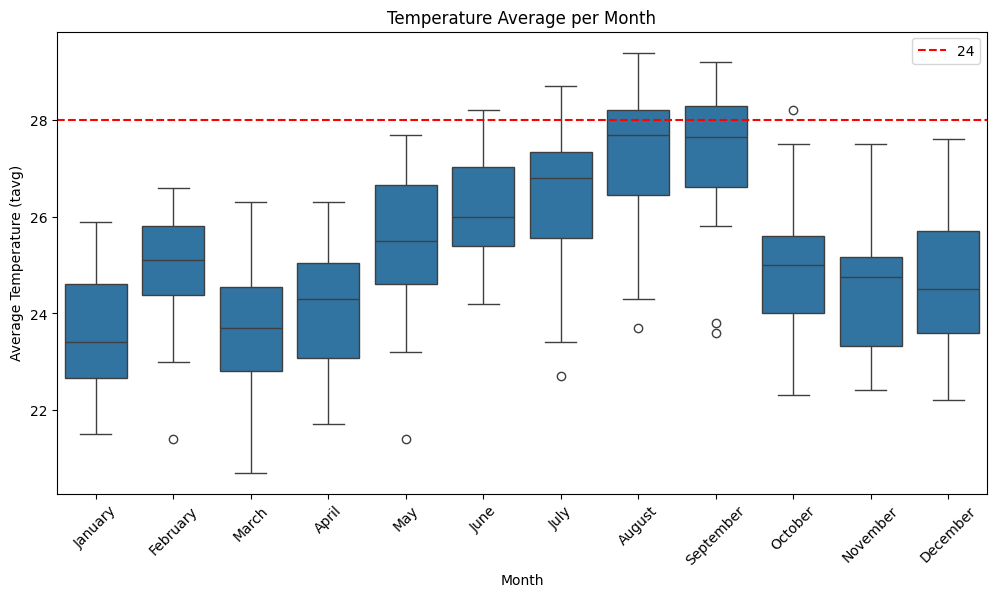

In [11]:
# boxplot of the temperature average per season for Armenia (Colombia)

import pandas as pd
df_armenia['date'] = pd.to_datetime(df_armenia['date'], errors='coerce')
df_armenia['month'] = df_armenia['date'].dt.month_name()

import seaborn as sns
import matplotlib.pyplot as plt

# boxplot of temperature averages grouped by month

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='tavg', data=df_armenia, order=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'))
plt.title('Temperature Average per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (tavg)')
plt.xticks(rotation=45)

# cutoff lines showing over 24 degrees not optimal (under 18 not optimal but not in dataset)

plt.axhline(y=28, color='red', linestyle='--', label='24')
plt.legend()
plt.show()

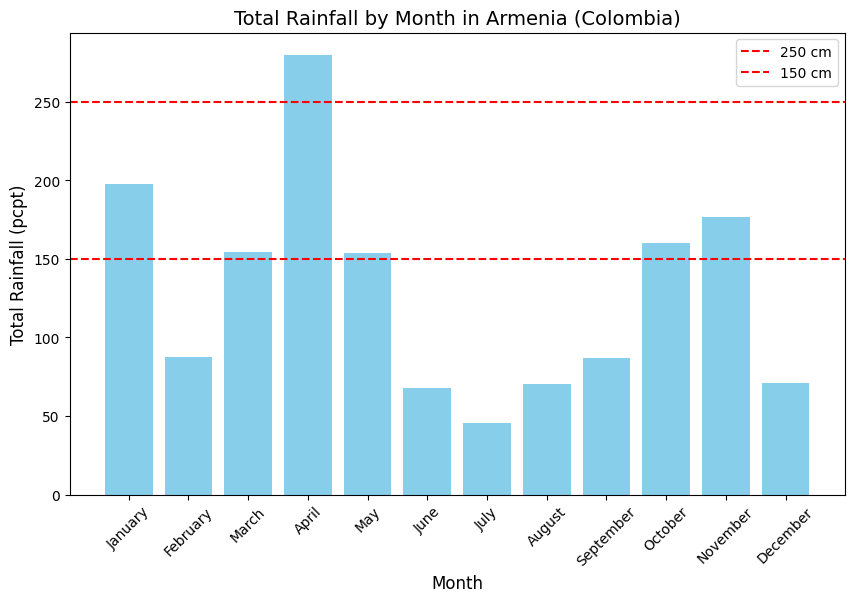

In [12]:
# grouping by months and sorting the months in calender order
monthly_rainfall = df_armenia.groupby('month')['prcp'].sum().reset_index()
monthly_rainfall['month'] = pd.Categorical(monthly_rainfall['month'], categories=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'), ordered=True)
monthly_rainfall = monthly_rainfall.sort_values('month')

# plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_rainfall['month'], monthly_rainfall['prcp'], color='skyblue')
plt.title('Total Rainfall by Month in Armenia (Colombia)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rainfall (pcpt)', fontsize=12)
plt.xticks(rotation=45) 

#adding the two cutoff lines for the coffee 
plt.axhline(y=250, color='red', linestyle='--', label='250 cm')
plt.axhline(y=150, color='red', linestyle='--', label='150 cm')
plt.legend()
plt.show()

C:\Users\varoz\AppData\Local\Temp\ipykernel_11948\3028615587.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_wspd['month'] = pd.Categorical(monthly_avg_wspd['month'], categories=pd.date_range("2024-01-01", periods=12, freq='M').strftime('%B'), ordered=True)


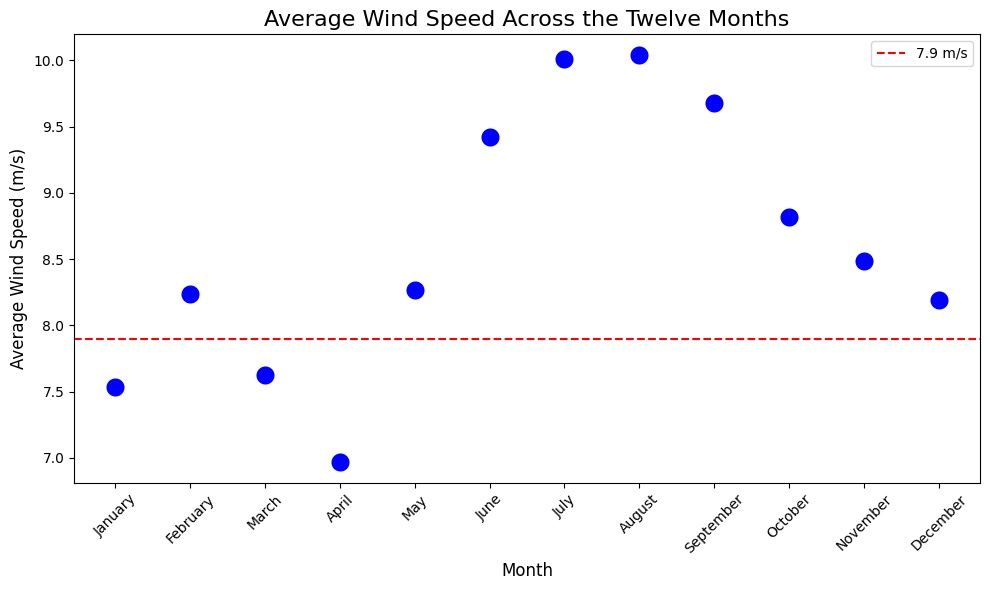

In [46]:
# grouping by months and sorting the months in calender order
monthly_avg_wspd = df_armenia.groupby('month')['wspd'].mean().reset_index()
monthly_avg_wspd['month'] = pd.Categorical(monthly_avg_wspd['month'], categories=pd.date_range("2024-01-01", periods=12, freq='M').strftime('%B'), ordered=True)
monthly_avg_wspd = monthly_avg_wspd.sort_values('month')


plt.figure(figsize=(10, 6))

# scatter plot showing the average wind speed for each month
sns.scatterplot(x='month', y='wspd', data=monthly_avg_wspd, s=200, color='blue', marker='o')


plt.title('Average Wind Speed Across the Twelve Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Wind Speed (m/s)', fontsize=12)
plt.xticks(rotation=45)  # Rotate month labels for better readability

# cutoff horizontal line at 7.9 m/s (maximum of the wanted wind speed range)
plt.axhline(y=7.9, color='red', linestyle='--', label='7.9 m/s')
plt.legend()


plt.tight_layout()
plt.show()

In [14]:
#FOR POÇOS DE CALDAS (BRAZIL)

In [15]:
private_api_key_1 = "8cd9770d46msh2bda7a77ebe30d6p10b83fjsnb5061a8acbd1"

response_1 = requests.get("https://commodities-apised.p.rapidapi.com/v1/supported",
                       headers={
                           "x-rapidapi-host": "x-rapidapi-host: meteostat.p.rapidapi.com",
                           "X-RapidAPI-Key": private_api_key_1 # Add the private_api_key variable
                       })

In [16]:
print(response_1)

<Response [404]>


In [17]:
import requests
import pandas as pd
import matplotlib as mpl

In [18]:
import requests

In [19]:
response = requests.get("https://randomuser.me/api/")

In [20]:
print(response.status_code)

200


In [21]:
response.json()

{'results': [{'gender': 'male',
   'name': {'title': 'Mr', 'first': 'Patrick', 'last': 'Martinez'},
   'location': {'street': {'number': 5015, 'name': "O'Connell Street"},
    'city': 'Arklow',
    'state': 'Meath',
    'country': 'Ireland',
    'postcode': 36234,
    'coordinates': {'latitude': '2.4509', 'longitude': '-26.2080'},
    'timezone': {'offset': '-8:00',
     'description': 'Pacific Time (US & Canada)'}},
   'email': 'patrick.martinez@example.com',
   'login': {'uuid': 'c92880a4-041a-48c7-a55b-d50ee002dca5',
    'username': 'greenpanda838',
    'password': 'ford',
    'salt': 'cthNGUBy',
    'md5': '8e5a0f3be6421ea7830b980e9243af42',
    'sha1': '5ab987c045e6ecae4b11d8a9d23058ec2a8882cb',
    'sha256': '3ab8ce17e5b3d2dc296eeda9667b351aeac874b449062348f58af7ad92488d7a'},
   'dob': {'date': '1964-04-05T14:32:45.208Z', 'age': 60},
   'registered': {'date': '2002-04-08T23:12:10.794Z', 'age': 22},
   'phone': '071-001-8763',
   'cell': '081-403-0934',
   'id': {'name': 'PPS', 'v

In [22]:
private_api_key = "dfdd251ecbmshf1b35f78d2c4d46p164064jsn30c557b5eacc"

In [23]:
# Weather Data Poços de Caldas(Brazil)
params = {
  "lat": "-21.7872",  # Poços de Caldas' latitude
    "lon": "-46.5616",  # Poços de Caldas' longitude
    "start": "2023-01-01",  # Today's date
    "end": "2023-12-31"  # 1 year later
}

response = requests.get("https://meteostat.p.rapidapi.com/point/daily",
                       params=params,
                       headers={
                           "X-RapidAPI-Host": "meteostat.p.rapidapi.com",
                           "X-RapidAPI-Key": private_api_key # Add the private_api_key variable 
                       })

In [24]:
print(response.json())

{'meta': {'generated': '2024-10-23 07:40:11', 'stations': ['86846', '83681', '83683', '83033']}, 'data': [{'date': '2023-01-01', 'tavg': 19.9, 'tmin': 16.7, 'tmax': 25.0, 'prcp': 5.2, 'snow': None, 'wdir': 16.0, 'wspd': 1.9, 'wpgt': None, 'pres': 1024.3, 'tsun': None}, {'date': '2023-01-02', 'tavg': 19.8, 'tmin': 16.6, 'tmax': 23.5, 'prcp': 8.4, 'snow': None, 'wdir': 39.0, 'wspd': 4.6, 'wpgt': None, 'pres': 1021.8, 'tsun': None}, {'date': '2023-01-03', 'tavg': 19.2, 'tmin': 17.7, 'tmax': 22.0, 'prcp': 13.6, 'snow': None, 'wdir': 358.0, 'wspd': 1.6, 'wpgt': None, 'pres': 1021.0, 'tsun': None}, {'date': '2023-01-04', 'tavg': 20.0, 'tmin': 17.5, 'tmax': 23.7, 'prcp': 12.9, 'snow': None, 'wdir': 350.0, 'wspd': 4.2, 'wpgt': None, 'pres': 1019.0, 'tsun': None}, {'date': '2023-01-05', 'tavg': 19.6, 'tmin': 17.5, 'tmax': 23.1, 'prcp': 26.5, 'snow': None, 'wdir': 27.0, 'wspd': 4.8, 'wpgt': None, 'pres': 1020.1, 'tsun': None}, {'date': '2023-01-06', 'tavg': 17.9, 'tmin': 15.7, 'tmax': 20.2, 'prc

In [25]:
import json
PDC = response.json() #PDC is Poços de Caldas
#print(json.dumps(PDC, indent=4))

In [26]:
PDC = response.json()

# creating dataFrame from the JSON data
df_PDC = pd.DataFrame(PDC["data"])


print(df_PDC)

           date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
0    2023-01-01  19.9  16.7  25.0   5.2  None   16.0   1.9  None  1024.3  None
1    2023-01-02  19.8  16.6  23.5   8.4  None   39.0   4.6  None  1021.8  None
2    2023-01-03  19.2  17.7  22.0  13.6  None  358.0   1.6  None  1021.0  None
3    2023-01-04  20.0  17.5  23.7  12.9  None  350.0   4.2  None  1019.0  None
4    2023-01-05  19.6  17.5  23.1  26.5  None   27.0   4.8  None  1020.1  None
..          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
360  2023-12-27  22.9  18.2  28.6   0.7  None   44.0   2.8  None  1014.0  None
361  2023-12-28  22.0  18.0  29.2   0.0  None   37.0   3.2  None  1014.8  None
362  2023-12-29  23.6  15.5  31.2   0.0  None  328.0   3.3  None  1012.5  None
363  2023-12-30  22.6  16.2  29.2   3.6  None  189.0   4.1  None  1013.0  None
364  2023-12-31  21.1  17.6  25.6   3.2  None   45.0   3.9  None  1014.4  None

[365 rows x 11 columns]


In [27]:
df_PDC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    365 non-null    object 
 1   tavg    365 non-null    float64
 2   tmin    365 non-null    float64
 3   tmax    365 non-null    float64
 4   prcp    365 non-null    float64
 5   snow    0 non-null      object 
 6   wdir    365 non-null    float64
 7   wspd    365 non-null    float64
 8   wpgt    0 non-null      object 
 9   pres    365 non-null    float64
 10  tsun    0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 31.5+ KB


In [28]:
df_PDC.drop(columns=["snow", "wpgt", "tsun"]) #dropping all the columns with 0 non-null

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2023-01-01,19.9,16.7,25.0,5.2,16.0,1.9,1024.3
1,2023-01-02,19.8,16.6,23.5,8.4,39.0,4.6,1021.8
2,2023-01-03,19.2,17.7,22.0,13.6,358.0,1.6,1021.0
3,2023-01-04,20.0,17.5,23.7,12.9,350.0,4.2,1019.0
4,2023-01-05,19.6,17.5,23.1,26.5,27.0,4.8,1020.1
...,...,...,...,...,...,...,...,...
360,2023-12-27,22.9,18.2,28.6,0.7,44.0,2.8,1014.0
361,2023-12-28,22.0,18.0,29.2,0.0,37.0,3.2,1014.8
362,2023-12-29,23.6,15.5,31.2,0.0,328.0,3.3,1012.5
363,2023-12-30,22.6,16.2,29.2,3.6,189.0,4.1,1013.0


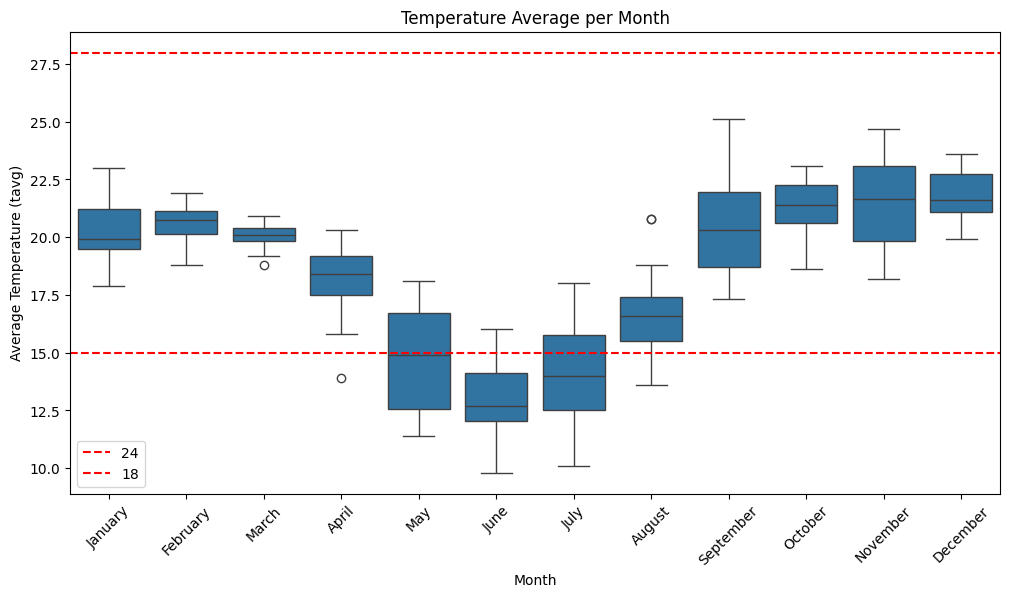

In [29]:
# converting date column
df_PDC['date'] = pd.to_datetime(df_PDC['date'])

df_PDC['month'] = df_PDC['date'].dt.month_name()

# boxplot of temperature averages grouped by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='tavg', data=df_PDC, order=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'))
plt.title('Temperature Average per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (tavg)')
plt.xticks(rotation=45)

# cutoff lines showing range 24 and 18 degrees 
plt.axhline(y=28, color='red', linestyle='--', label='24')
plt.axhline(y=15, color='red', linestyle='--', label='18')
plt.legend()

plt.show()

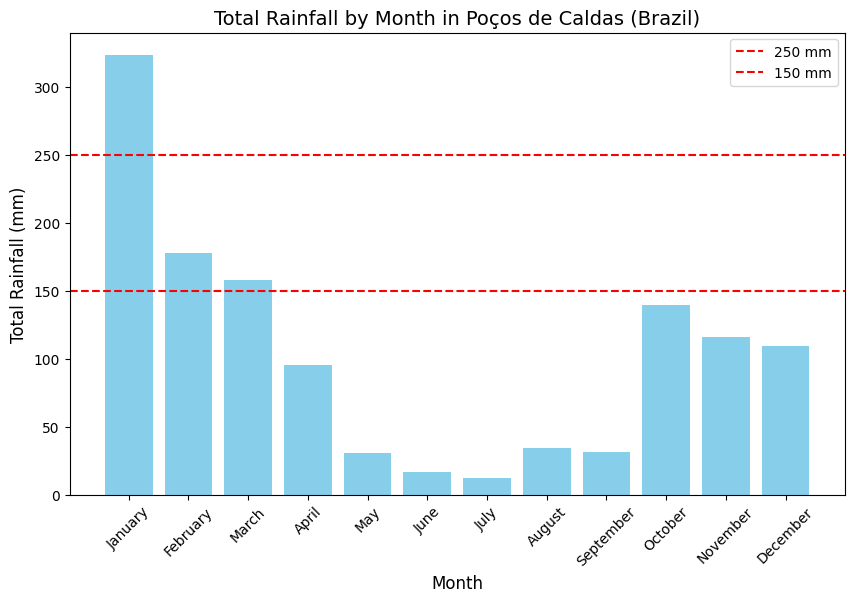

In [30]:
# grouping by months and sorting the months in calender order
monthly_rainfall = df_PDC.groupby('month')['prcp'].sum().reset_index()

monthly_rainfall['month'] = pd.Categorical(monthly_rainfall['month'], 
                                             categories=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'), 
                                             ordered=True)
monthly_rainfall = monthly_rainfall.sort_values('month')

# bar chart for monthly rainfall
plt.figure(figsize=(10, 6))
plt.bar(monthly_rainfall['month'], monthly_rainfall['prcp'], color='skyblue')
plt.title('Total Rainfall by Month in Poços de Caldas (Brazil)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)  # Changed 'pcpt' to 'mm' for clarity
plt.xticks(rotation=45) 

# cutoff lines for coffee cultivation between 150 and 250
plt.axhline(y=250, color='red', linestyle='--', label='250 mm')
plt.axhline(y=150, color='red', linestyle='--', label='150 mm')


plt.legend()
plt.show()

C:\Users\varoz\AppData\Local\Temp\ipykernel_11948\2296476107.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  categories=pd.date_range("2023-01-01", periods=12, freq='M').strftime('%B'),


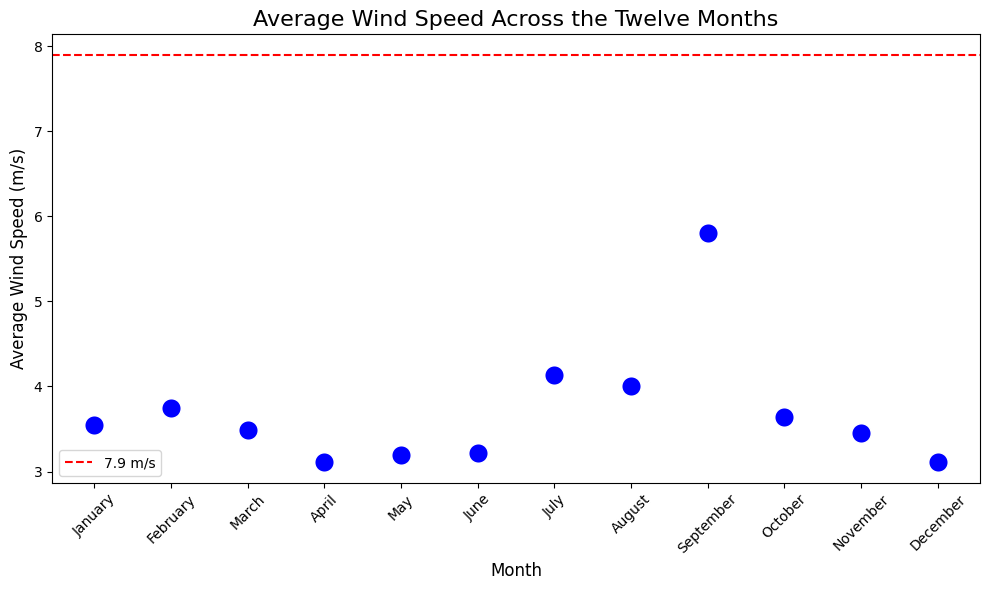

In [47]:
# grouping by months and sorting the months in calender order
monthly_avg_wspd = df_PDC.groupby('month')['wspd'].mean().reset_index()
monthly_avg_wspd['month'] = pd.Categorical(monthly_avg_wspd['month'], 
                                             categories=pd.date_range("2023-01-01", periods=12, freq='M').strftime('%B'), 
                                             ordered=True)
monthly_avg_wspd = monthly_avg_wspd.sort_values('month')


plt.figure(figsize=(10, 6))

# scatter plot showing the average wind speed for each month
sns.scatterplot(x='month', y='wspd', data=monthly_avg_wspd, s=200, color='blue', marker='o')


plt.title('Average Wind Speed Across the Twelve Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Wind Speed (m/s)', fontsize=12)
plt.xticks(rotation=45)  # Rotate month labels for better readability

# cutoff horizontal line at 7.9 m/s and 5.5 m/s

plt.axhline(y=7.9, color='red', linestyle='--', label='7.9 m/s')


plt.legend()
plt.tight_layout()
plt.show()

In [32]:
#FOR  Belo Horizonte (Minas Gerais, Brazil)

In [33]:
private_api_key = "dfdd251ecbmshf1b35f78d2c4d46p164064jsn30c557b5eacc"

In [34]:
# Weather Data for Belo Horizonte, Minas Gerais, Brazil)
params = {
    "lat": "-19.9245",  # Belo Horizonte's latitude
    "lon": "-43.9345",  # Belo Horizonte's longitude
    "start": "2023-01-01",  # Start of the current year
    "end": "2023-12-31"  # End of the current year
}

response = requests.get("https://meteostat.p.rapidapi.com/point/daily",
                         params=params,
                         headers={
                             "X-RapidAPI-Host": "meteostat.p.rapidapi.com",
                             "X-RapidAPI-Key": private_api_key  # Add the private_api_key variable 
                         })

In [35]:
print(response.json())

{'meta': {'generated': '2024-10-23 07:40:28', 'stations': ['83587', '86800', 'SBPR0', '83566']}, 'data': [{'date': '2023-01-01', 'tavg': 21.9, 'tmin': 20.0, 'tmax': 25.0, 'prcp': 6.9, 'snow': None, 'wdir': 43.0, 'wspd': 8.9, 'wpgt': None, 'pres': 1018.0, 'tsun': None}, {'date': '2023-01-02', 'tavg': 21.9, 'tmin': 18.8, 'tmax': 27.0, 'prcp': 13.9, 'snow': None, 'wdir': 81.0, 'wspd': 11.2, 'wpgt': None, 'pres': 1016.6, 'tsun': None}, {'date': '2023-01-03', 'tavg': 21.4, 'tmin': 19.1, 'tmax': 25.0, 'prcp': 16.8, 'snow': None, 'wdir': 3.0, 'wspd': 8.0, 'wpgt': None, 'pres': 1015.1, 'tsun': None}, {'date': '2023-01-04', 'tavg': 21.7, 'tmin': 19.0, 'tmax': 27.0, 'prcp': 13.1, 'snow': None, 'wdir': 302.0, 'wspd': 9.7, 'wpgt': None, 'pres': 1015.4, 'tsun': None}, {'date': '2023-01-05', 'tavg': 21.2, 'tmin': 18.0, 'tmax': 24.0, 'prcp': 18.1, 'snow': None, 'wdir': 353.0, 'wspd': 8.6, 'wpgt': None, 'pres': 1014.8, 'tsun': None}, {'date': '2023-01-06', 'tavg': 21.8, 'tmin': 19.2, 'tmax': 25.0, 'pr

In [36]:
import json
BH = response.json() #BH is Belo Horizonte
#print(json.dumps(BH, indent=4))

In [37]:
BH = response.json()

# create a DataFrame from the JSON data
df_BH = pd.DataFrame(BH["data"])


print(df_BH)

           date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
0    2023-01-01  21.9  20.0  25.0   6.9  None   43.0   8.9  None  1018.0  None
1    2023-01-02  21.9  18.8  27.0  13.9  None   81.0  11.2  None  1016.6  None
2    2023-01-03  21.4  19.1  25.0  16.8  None    3.0   8.0  None  1015.1  None
3    2023-01-04  21.7  19.0  27.0  13.1  None  302.0   9.7  None  1015.4  None
4    2023-01-05  21.2  18.0  24.0  18.1  None  353.0   8.6  None  1014.8  None
..          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
360  2023-12-27  23.9  20.0  30.0  34.3  None  117.0  12.3  None  1016.6  None
361  2023-12-28  24.5  21.0  29.0   0.7  None   88.0  11.5  None  1017.5  None
362  2023-12-29  26.7  21.0  34.0   0.2  None   76.0   9.5  None  1015.7  None
363  2023-12-30  23.8  20.0  28.0  10.0  None   37.0  11.5  None  1015.2  None
364  2023-12-31  24.3  21.0  28.0  21.6  None   74.0  15.2  None  1016.0  None

[365 rows x 11 columns]


In [38]:
df_BH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    365 non-null    object 
 1   tavg    365 non-null    float64
 2   tmin    365 non-null    float64
 3   tmax    365 non-null    float64
 4   prcp    365 non-null    float64
 5   snow    0 non-null      object 
 6   wdir    365 non-null    float64
 7   wspd    365 non-null    float64
 8   wpgt    0 non-null      object 
 9   pres    365 non-null    float64
 10  tsun    0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 31.5+ KB


In [39]:
df_BH.drop(columns=["snow", "wpgt", "tsun"]) # dropping all the 0 non-null columns

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2023-01-01,21.9,20.0,25.0,6.9,43.0,8.9,1018.0
1,2023-01-02,21.9,18.8,27.0,13.9,81.0,11.2,1016.6
2,2023-01-03,21.4,19.1,25.0,16.8,3.0,8.0,1015.1
3,2023-01-04,21.7,19.0,27.0,13.1,302.0,9.7,1015.4
4,2023-01-05,21.2,18.0,24.0,18.1,353.0,8.6,1014.8
...,...,...,...,...,...,...,...,...
360,2023-12-27,23.9,20.0,30.0,34.3,117.0,12.3,1016.6
361,2023-12-28,24.5,21.0,29.0,0.7,88.0,11.5,1017.5
362,2023-12-29,26.7,21.0,34.0,0.2,76.0,9.5,1015.7
363,2023-12-30,23.8,20.0,28.0,10.0,37.0,11.5,1015.2


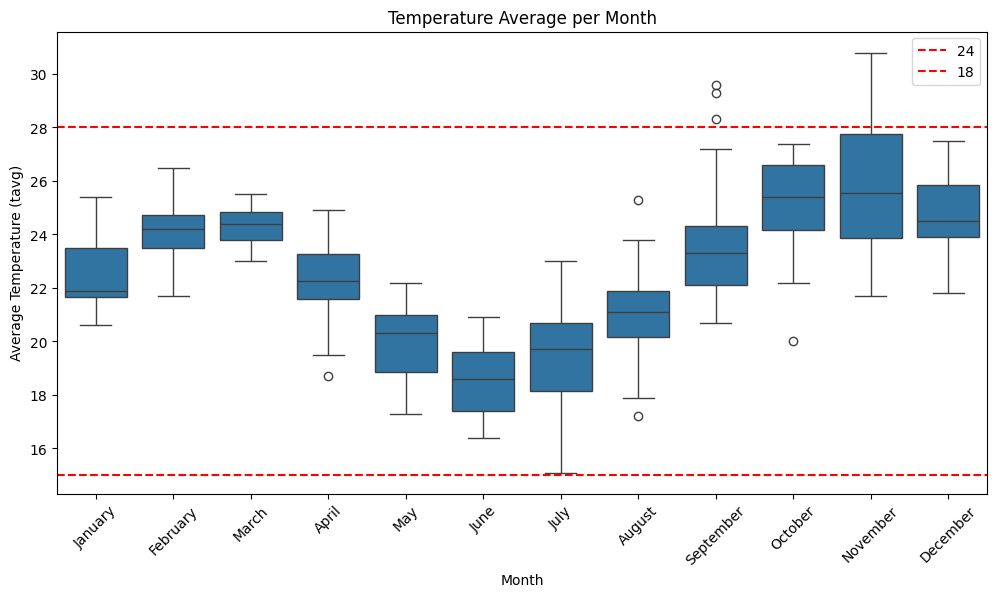

In [40]:
df_BH['date'] = pd.to_datetime(df_BH['date'])

df_BH['month'] = df_BH['date'].dt.month_name()

# boxplot of temperature averages grouped by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='tavg', data=df_BH, order=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'))
plt.title('Temperature Average per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (tavg)')
plt.xticks(rotation=45)

# cutoff lines showing between 18 and 24 degrees
plt.axhline(y=28, color='red', linestyle='--', label='24')
plt.axhline(y=15, color='red', linestyle='--', label='18')
plt.legend()
plt.show()

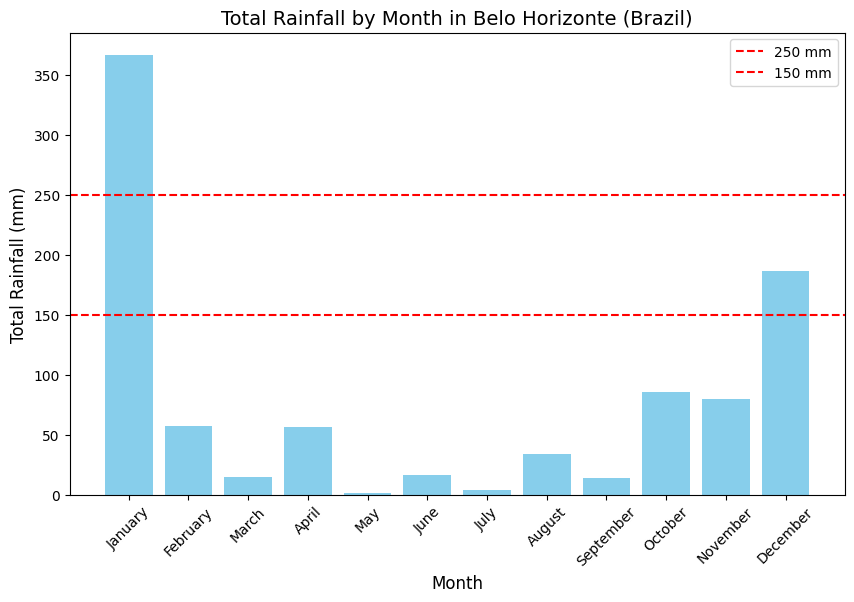

In [41]:
# grouping by months and sorting the months in calender order
monthly_rainfall = df_BH.groupby('month')['prcp'].sum().reset_index()

monthly_rainfall['month'] = pd.Categorical(monthly_rainfall['month'], 
                                             categories=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'), 
                                             ordered=True)
monthly_rainfall = monthly_rainfall.sort_values('month')

# bar chart for total rainfall
plt.figure(figsize=(10, 6))
plt.bar(monthly_rainfall['month'], monthly_rainfall['prcp'], color='skyblue')
plt.title('Total Rainfall by Month in Belo Horizonte (Brazil)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)  # Changed 'pcpt' to 'mm' for clarity
plt.xticks(rotation=45) 

# cutoff lines for coffee cultivation
plt.axhline(y=250, color='red', linestyle='--', label='250 mm')
plt.axhline(y=150, color='red', linestyle='--', label='150 mm')


plt.legend()
plt.show()

C:\Users\varoz\AppData\Local\Temp\ipykernel_11948\2963024567.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  categories=pd.date_range("2023-01-01", periods=12, freq='M').strftime('%B'),


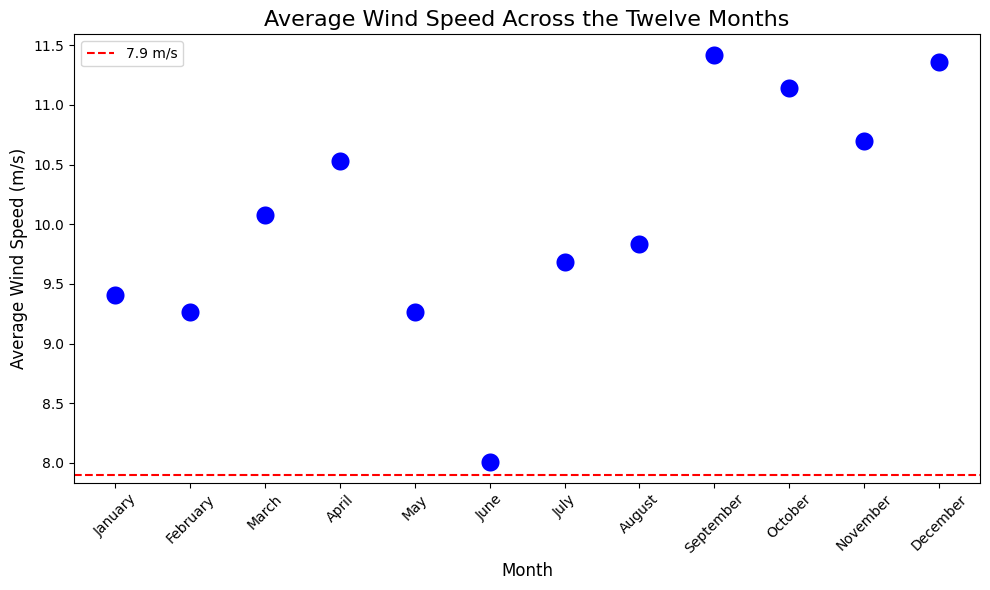

In [48]:
# grouping by months and sorting the months in calender order
monthly_avg_wspd = df_BH.groupby('month')['wspd'].mean().reset_index()
monthly_avg_wspd['month'] = pd.Categorical(monthly_avg_wspd['month'], 
                                             categories=pd.date_range("2023-01-01", periods=12, freq='M').strftime('%B'), 
                                             ordered=True)
monthly_avg_wspd = monthly_avg_wspd.sort_values('month')


plt.figure(figsize=(10, 6))

# scatter plot showing the average wind speed for each month
sns.scatterplot(x='month', y='wspd', data=monthly_avg_wspd, s=200, color='blue', marker='o')


plt.title('Average Wind Speed Across the Twelve Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Wind Speed (m/s)', fontsize=12)
plt.xticks(rotation=45)  # Rotate month labels for better readability

# cutoff horizontal line at 7.9 m/s (5.5 is not included as it is not in data set)
plt.axhline(y=7.9, color='red', linestyle='--', label='7.9 m/s')


plt.legend()
plt.tight_layout()
plt.show()

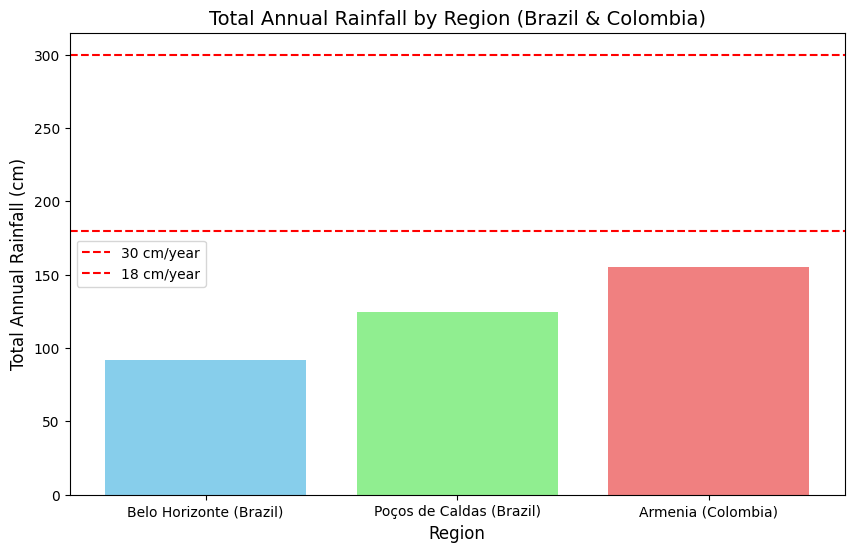

In [64]:
#the total annual rainfall for each region in cm (convert from mm to cm)
annual_rainfall_BH = df_BH['prcp'].sum() / 10  
annual_rainfall_PDC = df_PDC['prcp'].sum() / 10  
annual_rainfall_Armenia = df_armenia['prcp'].sum() / 10  

# create a DataFrame 
annual_rainfall = pd.DataFrame({
    'Region': ['Belo Horizonte (Brazil)', 'Poços de Caldas (Brazil)', 'Armenia (Colombia)'],
    'Total Rainfall (cm)': [annual_rainfall_BH, annual_rainfall_PDC, annual_rainfall_Armenia]
})


plt.figure(figsize=(10, 6))
plt.bar(annual_rainfall['Region'], annual_rainfall['Total Rainfall (cm)'], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Total Annual Rainfall by Region (Brazil & Colombia)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Annual Rainfall (cm)', fontsize=12)

# cutoff lines for wind speed
plt.axhline(y=250 * 12 / 10, color='red', linestyle='--', label='30 cm/year')
plt.axhline(y=150 * 12 / 10, color='red', linestyle='--', label='18 cm/year')

plt.legend()
plt.show()